In [ ]:
!pip install seaborn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
from google.colab import drive
drive.mount('/content/drive')

#!ls /content/drive/MyDrive/

df = pd.read_csv('/content/drive/MyDrive/IrisData_full.csv', sep=',', low_memory = False)
#df.tail()
#df.dtypes
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [35]:
# Перемішуємо записи
np.random.seed(13)
df = df.sample(frac=1).reset_index(drop=True)
print("Перші 10 записів після перемішування:\n", df.head(10))

Перші 10 записів після перемішування:
    sepal_length  sepal_width  petal_length  petal_width          species
0           4.8          3.0           1.4          0.3      Iris-setosa
1           5.1          2.5           3.0          1.1  Iris-versicolor
2           5.4          3.4           1.5          0.4      Iris-setosa
3           5.6          2.7           4.2          1.3  Iris-versicolor
4           5.2          3.4           1.4          0.2      Iris-setosa
5           7.6          3.0           6.6          2.1   Iris-virginica
6           6.1          2.9           4.7          1.4  Iris-versicolor
7           4.6          3.6           1.0          0.2      Iris-setosa
8           6.4          2.8           5.6          2.2   Iris-virginica
9           6.0          2.2           4.0          1.0  Iris-versicolor


In [25]:
print("Перші 10 записів після перемішування:\n", df.head(10))

Перші 10 записів після перемішування:
    sepal_length  sepal_width  petal_length  petal_width          species
0           5.9          3.0           5.1          1.8   Iris-virginica
1           6.0          3.4           4.5          1.6  Iris-versicolor
2           4.5          2.3           1.3          0.3      Iris-setosa
3           5.8          2.7           4.1          1.0  Iris-versicolor
4           7.3          2.9           6.3          1.8   Iris-virginica
5           4.4          3.2           1.3          0.2      Iris-setosa
6           5.5          2.3           4.0          1.3  Iris-versicolor
7           5.7          3.0           4.2          1.2  Iris-versicolor
8           4.8          3.0           1.4          0.1      Iris-setosa
9           6.9          3.1           4.9          1.5  Iris-versicolor


In [39]:
from sklearn.preprocessing import MinMaxScaler

# Вибір лише числових параметрів
features = df.iloc[:, :-1]  # Останній стовпець - це 'species'

# Нормалізація параметрів
scaler = MinMaxScaler()
df_normalized = scaler.fit_transform(features)

# Створення нового DataFrame з нормалізованими даними і додавання колонки 'species'
df_normalized = pd.DataFrame(df_normalized, columns=features.columns)
df_normalized['species'] = df['species']

print("Перші 10 записів після нормалізації:\n", df_normalized.head(10))


Перші 10 записів після нормалізації:
    sepal_length  sepal_width  petal_length  petal_width          species
0      0.138889     0.416667      0.067797     0.083333      Iris-setosa
1      0.222222     0.208333      0.338983     0.416667  Iris-versicolor
2      0.305556     0.583333      0.084746     0.125000      Iris-setosa
3      0.361111     0.291667      0.542373     0.500000  Iris-versicolor
4      0.250000     0.583333      0.067797     0.041667      Iris-setosa
5      0.916667     0.416667      0.949153     0.833333   Iris-virginica
6      0.500000     0.375000      0.627119     0.541667  Iris-versicolor
7      0.083333     0.666667      0.000000     0.041667      Iris-setosa
8      0.583333     0.333333      0.779661     0.875000   Iris-virginica
9      0.472222     0.083333      0.508475     0.375000  Iris-versicolor


In [31]:
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']


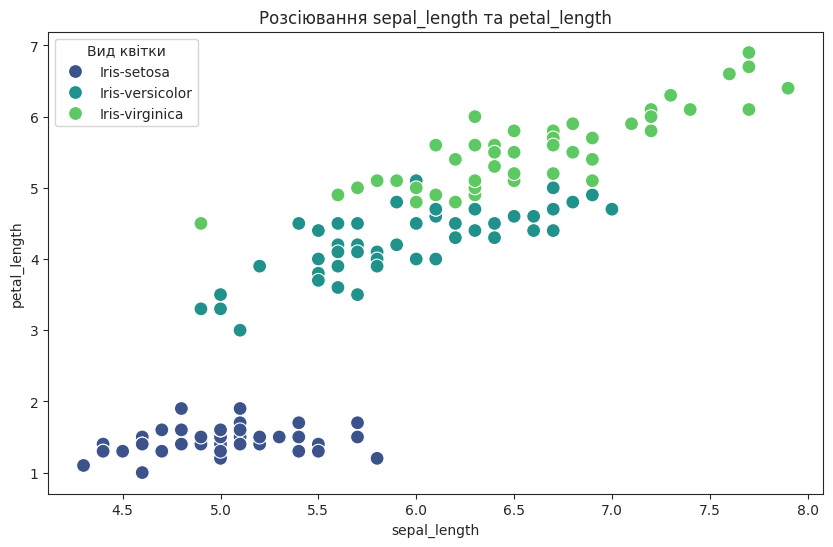

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Побудова графіку розсіювання
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sepal_length', y='petal_length', hue='species', palette='viridis', s=100)
plt.title('Розсіювання sepal_length та petal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(title='Вид квітки')
plt.show()


In [ ]:
print(df.head())       # Перегляньте перші кілька рядків
print(df.columns)      # Перегляньте назви всіх колонок


   5.1  3.5  1.4  0.2      Iris-setosa
0  5.9  3.0  5.1  1.8   Iris-virginica
1  6.0  3.4  4.5  1.6  Iris-versicolor
2  4.5  2.3  1.3  0.3      Iris-setosa
3  5.8  2.7  4.1  1.0  Iris-versicolor
4  7.3  2.9  6.3  1.8   Iris-virginica
Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')


In [ ]:
df.columns = df.columns.str.strip()


Розмір навчальної вибірки: 119
Розмір тестової вибірки: 30


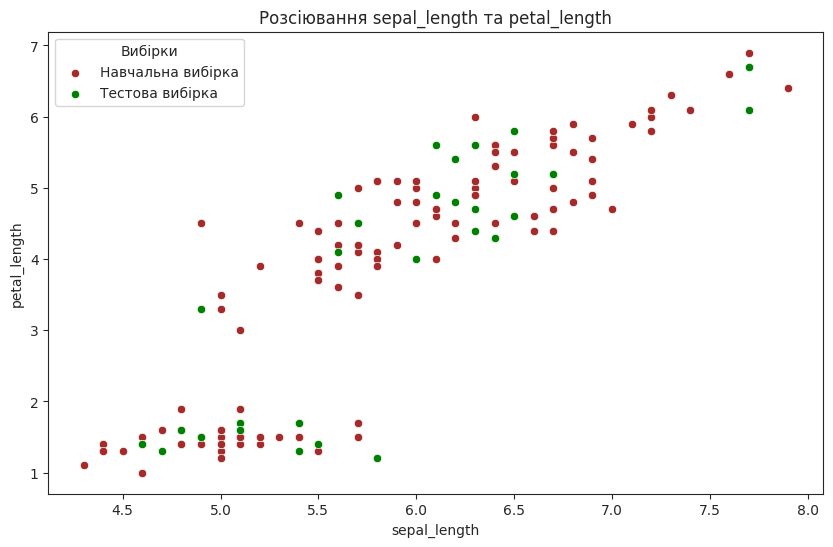

In [40]:
X = df['sepal_length']
y = df['petal_length']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір навчальної вибірки:", X_train.shape[0])
print("Розмір тестової вибірки:", X_test.shape[0])

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train, y=y_train, color='brown', label='Навчальна вибірка')

sns.scatterplot(x=X_test, y=y_test, color='green', label='Тестова вибірка')

plt.title('Розсіювання sepal_length та petal_length')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(title='Вибірки')
plt.show()

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

scaler = MinMaxScaler()

df[features] = scaler.fit_transform(df[features])

X = df[features]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

k_values = range(1, 16)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((k, accuracy))
    print(f"Точність для K={k}: {accuracy:.4f}")

best_k = max(accuracies, key=lambda x: x[1])[0]
print(f"Найкраще значення K: {best_k}")


Точність для K=1: 0.9111
Точність для K=2: 0.9111
Точність для K=3: 0.9111
Точність для K=4: 0.9333
Точність для K=5: 0.9333
Точність для K=6: 0.9333
Точність для K=7: 0.9111
Точність для K=8: 0.9333
Точність для K=9: 0.9333
Точність для K=10: 0.9333
Точність для K=11: 0.9333
Точність для K=12: 0.9333
Точність для K=13: 0.9111
Точність для K=14: 0.9333
Точність для K=15: 0.9111
Найкраще значення K: 4


Розмір навчальної вибірки: 119
Розмір тестової вибірки: 30


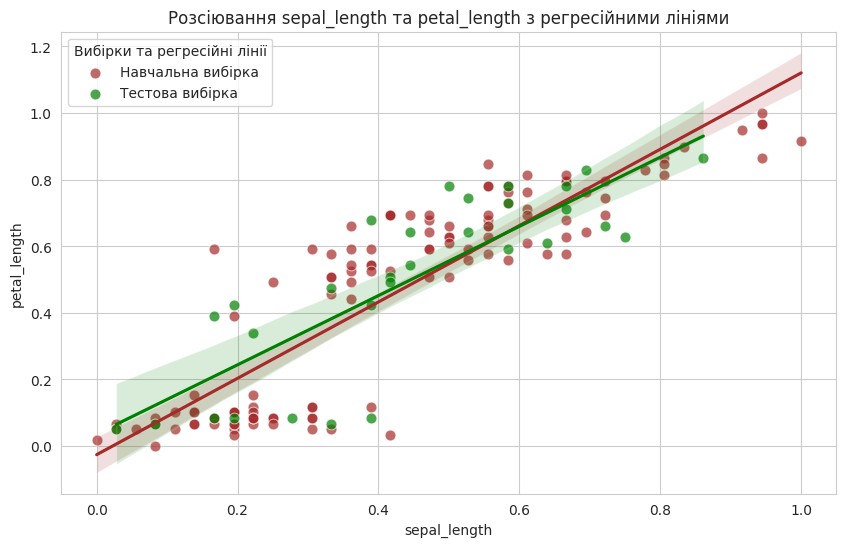

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Вибираємо ознаки та мітки
X = df['sepal_length']
y = df['petal_length']

# Розділяємо на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вивід розмірів вибірок
print("Розмір навчальної вибірки:", X_train.shape[0])
print("Розмір тестової вибірки:", X_test.shape[0])

# Налаштування стилю графіка
sns.set_style("whitegrid")

# Побудова графіку для навчальної вибірки з регресійною лінією
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train, y=y_train, color='brown', label='Навчальна вибірка', s=60, alpha=0.7)
sns.regplot(x=X_train, y=y_train, scatter=False, color='brown', line_kws={"label": "Регресія (навчальна)"})

# Побудова графіку для тестової вибірки з регресійною лінією
sns.scatterplot(x=X_test, y=y_test, color='green', label='Тестова вибірка', s=60, alpha=0.7)
sns.regplot(x=X_test, y=y_test, scatter=False, color='green', line_kws={"label": "Регресія (тестова)"})

# Додаткові налаштування
plt.title('Розсіювання sepal_length та petal_length з регресійними лініями')
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.legend(title='Вибірки та регресійні лінії')
plt.show()


Розмір навчальної вибірки: 119
Розмір тестової вибірки: 30


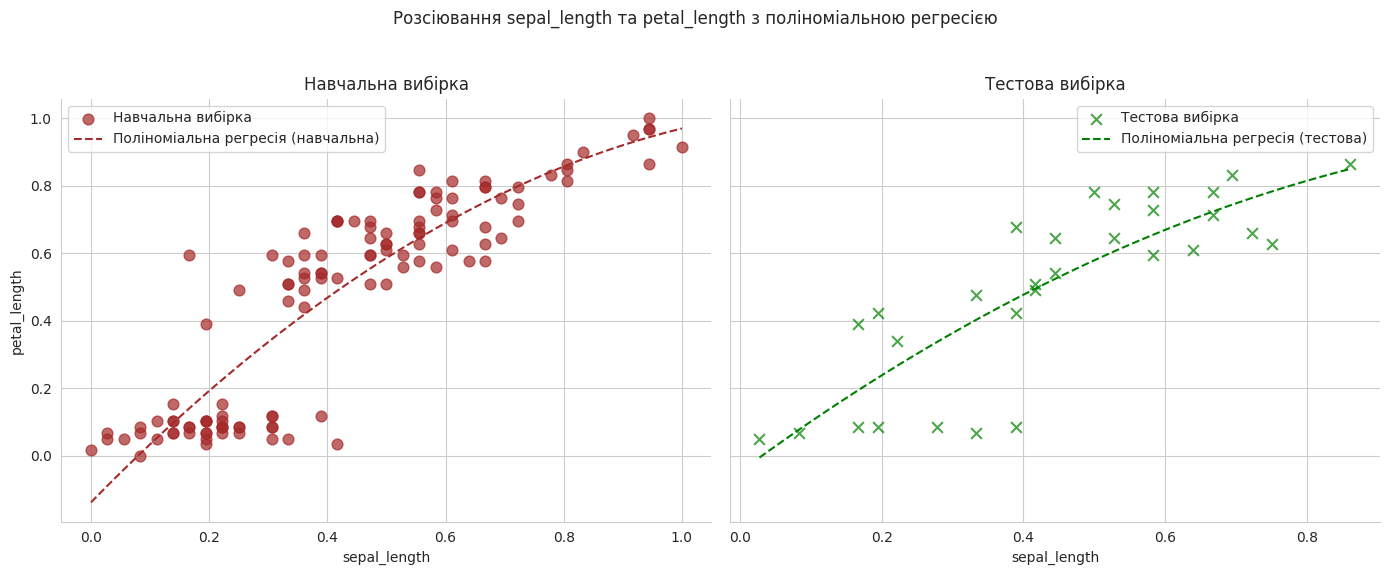

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from numpy.polynomial.polynomial import Polynomial

# Вибираємо ознаки та мітки
X = df['sepal_length']
y = df['petal_length']

# Розділяємо на навчальну і тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Вивід розмірів вибірок
print("Розмір навчальної вибірки:", X_train.shape[0])
print("Розмір тестової вибірки:", X_test.shape[0])

# Підграфіки для навчальної і тестової вибірок
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.set_style("ticks")

# Графік навчальної вибірки з поліноміальною регресією
axs[0].scatter(X_train, y_train, color='brown', label='Навчальна вибірка', s=60, marker="o", alpha=0.7)
p_train = Polynomial.fit(X_train, y_train, deg=2)  # Поліноміальна регресія 2-го ступеня
axs[0].plot(*p_train.linspace(), color="brown", linestyle="--", label="Поліноміальна регресія (навчальна)")
axs[0].set_title('Навчальна вибірка')
axs[0].set_xlabel('sepal_length')
axs[0].set_ylabel('petal_length')
axs[0].legend()

# Графік тестової вибірки з поліноміальною регресією
axs[1].scatter(X_test, y_test, color='green', label='Тестова вибірка', s=60, marker="x", alpha=0.7)
p_test = Polynomial.fit(X_test, y_test, deg=2)  # Поліноміальна регресія 2-го ступеня
axs[1].plot(*p_test.linspace(), color="green", linestyle="--", label="Поліноміальна регресія (тестова)")
axs[1].set_title('Тестова вибірка')
axs[1].set_xlabel('sepal_length')
axs[1].legend()

# Додаткові налаштування
plt.suptitle('Розсіювання sepal_length та petal_length з поліноміальною регресією')
sns.despine()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
